In [1]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

In [2]:
f = pm.cofe_room_t()
f.load()
f.preprocess()
f.process()

g=f[6]

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
loading set: 9
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
preprocessing set: 9
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8
processing set: 9


In [3]:
g.analyze()

In [4]:
phih = g.data['phih']
phim = g.fit_anisotropy.phim
c = g.data[0.]
s = g.data[45.]

phihdense = np.linspace(-5,180,num=2000)
phimdense = np.degrees(g.fit_anisotropy.free_energy.phih2phim(np.radians(phihdense), hext=207))
df = pd.DataFrame({'phih':phihdense,'phim':phimdense})


phimticks = np.linspace(0,175,num=15)

In [5]:
def fn(x):
    return df['phih'][(df['phim']-x).abs().argsort()[0]]

phihticks = np.vectorize(fn)(phimticks)

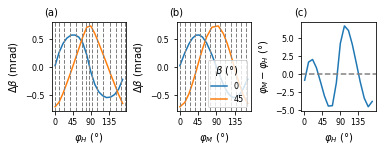

In [6]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(5.2,2),constrained_layout=True)

ax1.plot(phih,c,label='0')
ax1.plot(phih,s,label='45')

ax2.plot(phim,c,label='0')
ax2.plot(phim,s,label='45')

ax3.plot(phih, phim-phih)
ax3.axhline(y=0, color='gray', linestyle='dashed')

for m in phihticks:
    ax1.axvline(x=m, color='gray', linestyle='dashed', linewidth=1)
for m in phimticks:
    ax2.axvline(x=m, color='gray', linestyle='dashed', linewidth=1)
    
ax1.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax3.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax2.set_xlabel(r'$\varphi_M$ ($\degree$)')
ax1.set_ylabel(r'$\Delta\beta$ (mrad)')
ax2.set_ylabel(r'$\Delta\beta$ (mrad)')
ax3.set_ylabel(r'$\varphi_M - \varphi_H$ ($\degree$)')

ax1.text(-0.1, 1.08, "(a)", transform=ax1.transAxes)
ax2.text(-0.1, 1.08, "(b)", transform=ax2.transAxes)
ax3.text(-0.1, 1.08, "(c)", transform=ax3.transAxes)

ax2.legend(loc='lower right',title=r'$\beta$ ($\degree$)')

ax1.set_xticks([0,45,90,135])
ax2.set_xticks([0,45,90,135])
ax3.set_xticks([0,45,90,135])



fig.savefig('out/anizotropie-ukazka.pdf')

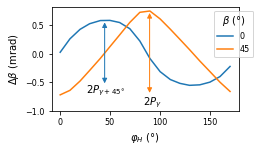

In [7]:
fig2, ax = plt.subplots(figsize=(3.5,2),constrained_layout=True)

ax.plot(phih,c, label=r'0')
ax.plot(phih,s, label='45')

ax.legend(title=r'$\beta$ ($\degree$)', bbox_to_anchor=(1.1,1))

ax.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax.set_ylabel(r'$\Delta\beta$ (mrad)')

ax.annotate('', xy=(45,c.min()), xytext=(45,c.max()),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<|-|>', 'color':'C0'}, color='yellow')

ax.annotate('', xy=(90,s.min()), xytext=(90,s.max()),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<|-|>', 'color':'C1'}, color='yellow')

ax.annotate(r'$2P_{\gamma+45\degree}$',xy=(65,-0.65), ha='right', va='center')

ax.annotate(r'$2P_{\gamma}$',xy=(102,-0.85), ha='right', va='center')

ax.set_ylim(ymin=-1)

fig2.savefig('out/pmld-ukazka.pdf')